<a href="https://colab.research.google.com/github/hws2002/Master-Python-with-Just-One-Book-ADP/blob/main/Chapter8/Mock1/mock_test1_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신러닝

# 데이터 로드 및 살펴보기

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/refs/heads/main/data/student_data.csv')

데이터의 정보를 살펴보자

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      394 non-null    float64
 5   freetime    393 non-null    float64
 6   goout       392 non-null    float64
 7   Dalc        391 non-null    float64
 8   Walc        393 non-null    float64
 9   health      391 non-null    float64
 10  absences    392 non-null    float64
 11  grade       395 non-null    int64  
 12  G1          395 non-null    int64  
 13  G2          395 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 43.3+ KB


In [ ]:
df.describe()

,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
count,394.000000,393.000000,392.000000,391.000000,393.000000,391.000000,392.000000,395.000000,395.000000,395.000000
mean,3.944162,3.239186,3.114796,1.470588,2.284987,3.562660,5.676020,10.660759,10.908861,10.713924
std,0.897794,0.994265,1.112397,0.873266,1.287778,1.386949,8.013393,3.719390,3.319195,3.761505
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000
25%,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,8.000000,9.000000
50%,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,13.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,19.000000


먼저 school, sex, paid, activities는 object타입, 나머지는 수치형 데이터임을 알 수 있다.  
이로써 위에 언급된 4가지 변수들을 인코딩해야 할 수도 있음을 먼저 인지하고 시작하자.  
좀 더 자세히 살펴보기 위해 df.head()를 실행시켜보자.

In [ ]:
df.head()

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8
3,GP,F,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,15,14
4,GP,F,yes,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,6,10


우선 paid와 activities는 yes 혹은 no의 값만 가진다는 사실을 알았다. 범주형 변수들의 도메인을 좀 더 살펴보자

In [ ]:
print(df.iloc[:,0].unique())
print(df.iloc[:,1].unique())
print(df.iloc[:,2].unique())
print(df.iloc[:,3].unique())

['GP' 'MS']
['F' 'M']
['no' 'yes']
['no' 'yes']


각 변수들은 최대 두개의 값만 가질 수 있음을 확인했다.  

# EDA


기본적인 EDA를 수행해보자  
먼저 산점도 행렬을 그려 학생의 성적이 어떤 변수와 뚜렷한 상관관계를 가지는지 살펴보자  
이에 앞서, 범주형 변수들도 성적에 영향을 줄 가능성이 있으니, 먼저 인코딩을 진행해보자

In [ ]:
df_encoded = df.copy()
df_encoded['school'] = df_encoded['school'].map({'GP' : 0, 'MS' : 1})
df_encoded['sex'] = df_encoded['sex'].map({'F' : 0, 'M' : 1})
df_encoded['paid'] = df_encoded['paid'].map({'no' : 0, 'yes' : 1})
df_encoded['activities'] = df_encoded['activities'].map({'no' : 0, 'yes' : 1})
df_encoded.head()

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,0,0,0,0,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,0,0,0,0,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,0,0,1,0,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8
3,0,0,1,1,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,15,14
4,0,0,1,0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,6,10


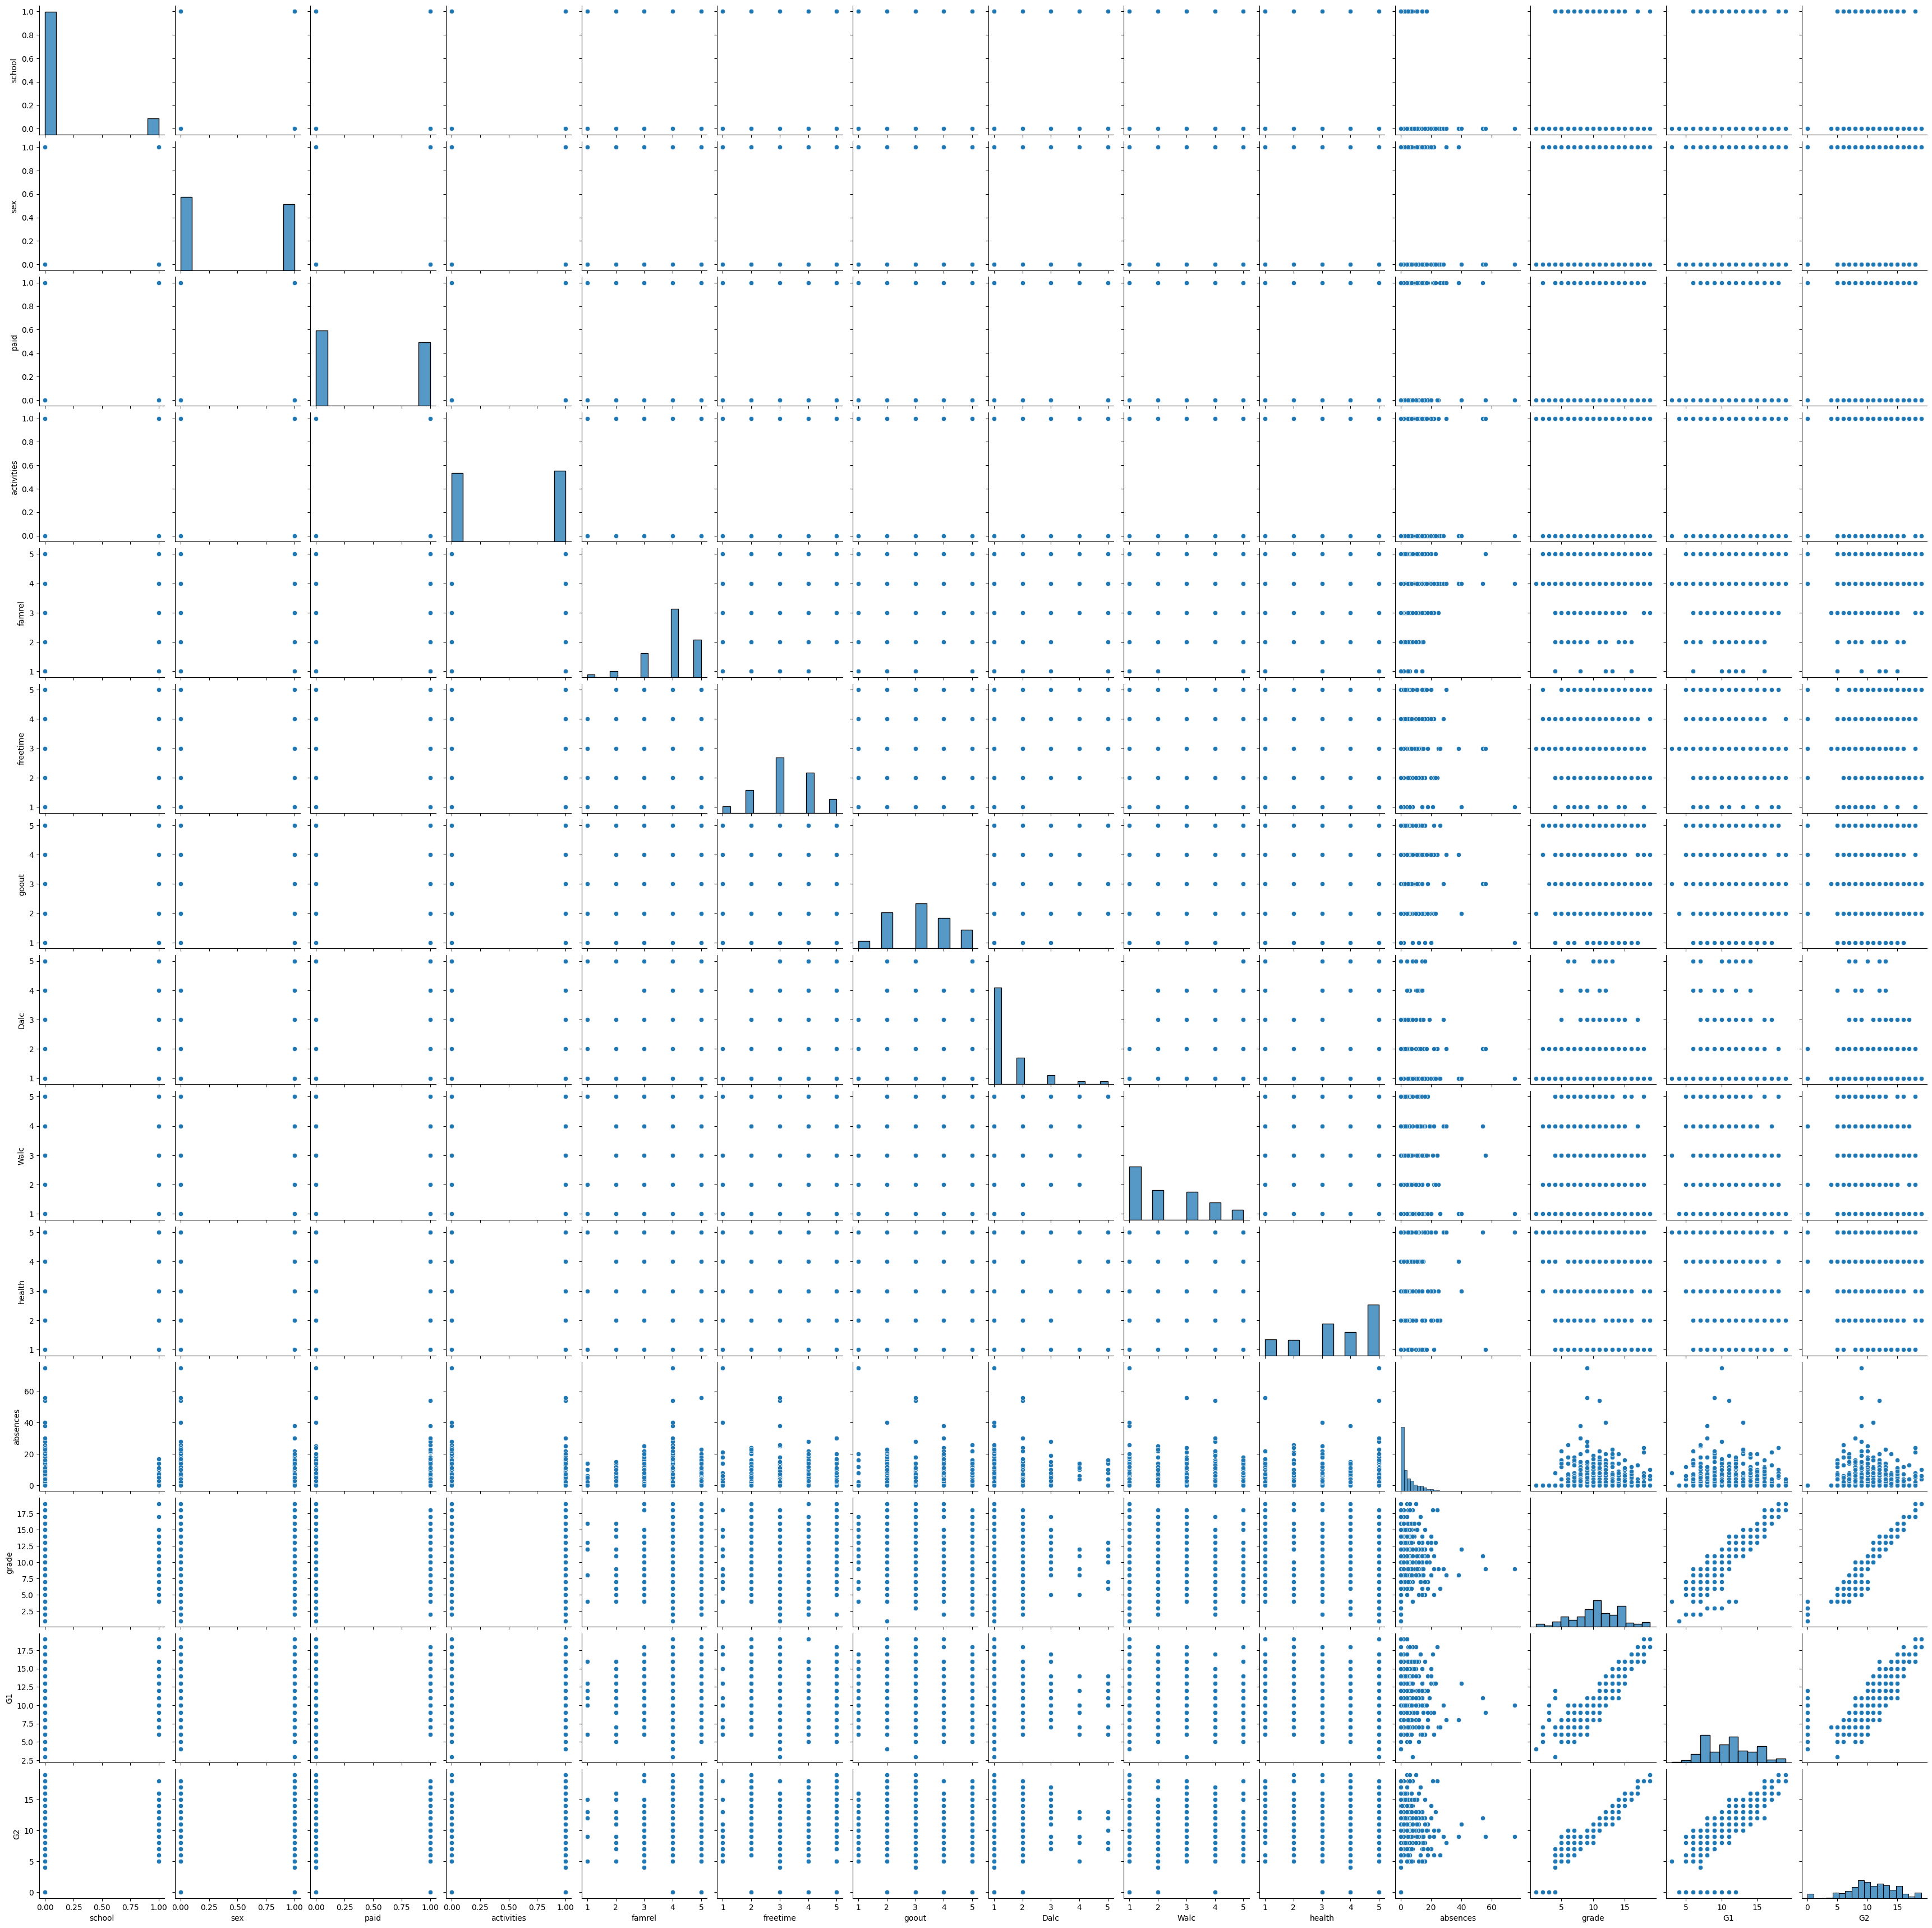

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df_encoded, diag_kind = 'auto')
plt.show()

산점도 행렬을 통해 G1,G2, absences 가 그나마 영향을 미치는 변수들임을 확인할 수 있다.  
특히, G1,G2는 grade변수와 강력한 선형 관계를 가지고 있는 것처럼 보인다.  
상관계수 행렬을 그려 이를 수치화해 나타내보자  

In [ ]:
df_corr = df_encoded.corr(method='pearson')
df_corr

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
school,1.000000,-0.012286,-0.017083,-0.116946,-0.047877,0.031863,-0.009137,0.121534,0.067022,-0.045171,-0.087253,-0.034833,-0.025731,-0.050086
sex,-0.012286,1.000000,-0.129126,0.099833,0.058888,0.237420,0.081152,0.281578,0.273383,0.139653,-0.063445,0.104336,0.091839,0.091099
paid,-0.017083,-0.129126,1.000000,-0.021382,0.000605,-0.072278,0.015911,0.075417,0.062352,-0.084185,0.008518,0.079885,0.039079,0.105198
activities,-0.116946,0.099833,-0.021382,1.000000,0.040901,0.098224,0.051761,-0.074186,-0.039565,0.030119,-0.016071,0.035700,0.057010,0.050552
famrel,-0.047877,0.058888,0.000605,0.040901,1.000000,0.150423,0.070786,-0.093578,-0.107129,0.100663,-0.048382,0.019283,0.022046,-0.018550
freetime,0.031863,0.237420,-0.072278,0.098224,0.150423,1.000000,0.291859,0.207442,0.145401,0.071042,-0.061367,0.002655,0.007682,-0.013058
goout,-0.009137,0.081152,0.015911,0.051761,0.070786,0.291859,1.000000,0.254985,0.418976,-0.002893,0.041860,-0.151587,-0.146386,-0.157856
Dalc,0.121534,0.281578,0.075417,-0.074186,-0.093578,0.207442,0.254985,1.000000,0.643805,0.059272,0.108628,-0.068208,-0.092063,-0.053369
Walc,0.067022,0.273383,0.062352,-0.039565,-0.107129,0.145401,0.418976,0.643805,1.000000,0.086701,0.135848,-0.090999,-0.128076,-0.084789
health,-0.045171,0.139653,-0.084185,0.030119,0.100663,0.071042,-0.002893,0.059272,0.086701,1.000000,-0.031690,-0.071952,-0.070849,-0.094068


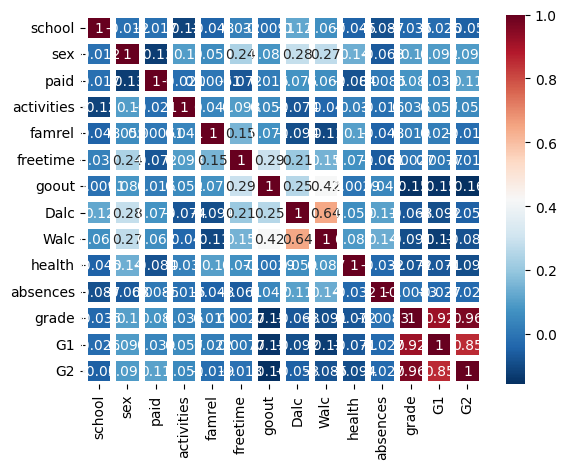

In [ ]:
sns.heatmap(df_corr,
            xticklabels = df_corr.columns,
            yticklabels = df_corr.columns,
            cmap = 'RdBu_r',
            annot=True,
            linewidth=3)
plt.show()

# 결측치 식별 및 예측

먼저 어떠한 변수들에 결측치가 존재하는지 확인하고, 결측치를 포함한 행을 출력해보자

In [ ]:
df.isna().sum()

,0
school,0
sex,0
paid,0
activities,0
famrel,1
freetime,2
goout,3
Dalc,4
Walc,2
health,4


In [ ]:
df.isnull().sum()

,0
school,0
sex,0
paid,0
activities,0
famrel,1
freetime,2
goout,3
Dalc,4
Walc,2
health,4


In [ ]:
df.isnull()

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,False,False,False,False,False,False,False,False,False,False,False,False,False,False
391,False,False,False,False,False,False,False,False,False,False,False,False,False,False
392,False,False,False,False,False,False,False,False,False,False,False,False,False,False
393,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
outliers_index = df.isnull().sum(axis = 1) != 0
df_encoded[outliers_index]

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
9,0,1,1,1,5.0,5.0,NaN,1.0,1.0,5.0,0.0,15,14,15
14,0,1,0,0,NaN,5.0,2.0,1.0,1.0,3.0,0.0,15,14,16
15,0,0,0,0,4.0,4.0,4.0,1.0,2.0,2.0,NaN,14,14,14
25,0,0,1,0,1.0,2.0,2.0,1.0,NaN,5.0,14.0,8,6,9
39,0,0,1,1,4.0,3.0,1.0,1.0,1.0,NaN,8.0,13,14,13
40,0,0,0,1,3.0,3.0,NaN,1.0,2.0,3.0,25.0,9,7,10
49,0,0,0,1,4.0,4.0,4.0,1.0,1.0,NaN,2.0,7,7,7
61,0,0,0,1,5.0,5.0,5.0,NaN,5.0,5.0,6.0,10,10,8
71,0,1,0,0,3.0,3.0,3.0,NaN,1.0,3.0,0.0,10,10,10
82,0,0,1,0,4.0,4.0,4.0,1.0,1.0,5.0,NaN,6,7,6


위 18개 행이 결측치를 포함하고 있다.  
결측치가 모두 수치형 데이터이므로, KNN기법을 이용하여 대체해보겠다.


In [ ]:
# 결측치가 있는 수치형 데이터만을 추출
outliers_column = df.isnull().sum(axis = 0) != 0
outliers_column

,0
school,False
sex,False
paid,False
activities,False
famrel,True
freetime,True
goout,True
Dalc,True
Walc,True
health,True


In [ ]:
outliers_column = outliers_column.index[outliers_column.values == [True]]
outliers_column

Index(['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'], dtype='object')

In [ ]:
from sklearn.impute import KNNImputer

# 모델링
imputer = KNNImputer()
df_filled = imputer.fit_transform(df_encoded[outliers_column])
df_filled = pd.DataFrame(df_filled)
df_filled.columns = outliers_column
df_filled

df_encoded[outliers_column] = df_filled
df_encoded.isna().sum()

,0
school,0
sex,0
paid,0
activities,0
famrel,0
freetime,0
goout,0
Dalc,0
Walc,0
health,0


# 범주형 변수 인코딩
앞서 EDA를 진행할때 진행하였다.  


# 데이터 분할

데이터분할은 랜덤 분할과 층화추출 분할이 있다.  
해당 데이터는 종속변수가 연속형이므로, 회귀분석을 사용한다. 그러므로 랜덤 샘플링을 통한 분할을 사용하여, 7:3 비율로 분할하였다.



In [ ]:
df_encoded = df_encoded.apply(lambda x : x.astype('float64') if x.dtype == 'int64' else x)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    float64
 1   sex         395 non-null    float64
 2   paid        395 non-null    float64
 3   activities  395 non-null    float64
 4   famrel      395 non-null    float64
 5   freetime    395 non-null    float64
 6   goout       395 non-null    float64
 7   Dalc        395 non-null    float64
 8   Walc        395 non-null    float64
 9   health      395 non-null    float64
 10  absences    395 non-null    float64
 11  grade       395 non-null    float64
 12  G1          395 non-null    float64
 13  G2          395 non-null    float64
dtypes: float64(14)
memory usage: 43.3 KB


In [ ]:
from sklearn.model_selection import train_test_split
features = df.columns.difference(['grade'])
X = df_encoded[features]
y = df_encoded['grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2022)
print(X_train.shape)
print(y_test.shape)

(276, 13)
(119,)


# svm vs. xgboost vs. randomforest
각각의 모델의 최적의 파라미터를 찾기 위해 gridsearch를 수행하자.  


## 먼저 svm모델을 구현해보자.  
성능향상을 위해 표준화를 진행한다.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = [
    {'C' : np.logspace(-1, 2, 4),
     'gamma' : np.logspace(-3, 2, 6)},
]

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)

grid_svr = GridSearchCV(estimator = SVR(),
                       param_grid = param_grid,
                       cv = 5)
grid_svr.fit(X_train_scaled, y_train)
print(grid_svr.best_score_)
print(grid_svr.best_params_)

0.9610523999927031
{'C': 100.0, 'gamma': 0.001}


In [ ]:
result = pd.DataFrame(grid_svr.cv_results_['params'])
result['mean_test_score'] = grid_svr.cv_results_['mean_test_score']
result.sort_values(by = 'mean_test_score', ascending = False, inplace = True)

result

,C,gamma,mean_test_score
18,100.0,0.001,0.961052
13,10.0,0.010,0.957154
19,100.0,0.010,0.947247
12,10.0,0.001,0.941819
7,1.0,0.010,0.921503
14,10.0,0.100,0.862825
20,100.0,0.100,0.858976
8,1.0,0.100,0.785790
6,1.0,0.001,0.303476
2,0.1,0.100,0.283738


## xgboost를 구현해보자


In [ ]:
from xgboost import XGBRegressor

param_grid = [{
    'learning_rate' : np.logspace(-3, 0, 4),
    'max_depth' : np.linspace(2,10,5).astype('int64')
    }
]

grid_xgb = GridSearchCV(estimator = XGBRegressor(),
                        param_grid = param_grid,
                        cv = 5)

grid_xgb.fit(X_train_scaled, y_train)
print(grid_xgb.best_score_)
print(grid_xgb.best_params_)

0.963954737520343
{'learning_rate': 0.1, 'max_depth': 2}


In [ ]:
result = pd.DataFrame(grid_xgb.cv_results_['params'])
result['mean_test_score'] = grid_xgb.cv_results_['mean_test_score']
result.sort_values(by = 'mean_test_score', ascending = False, inplace = True)
result

,learning_rate,max_depth,mean_test_score
10,0.100,2,0.963955
11,0.100,4,0.962626
13,0.100,8,0.955258
14,0.100,10,0.954852
12,0.100,6,0.953840
15,1.000,2,0.950950
18,1.000,8,0.937669
16,1.000,4,0.936108
19,1.000,10,0.935138
17,1.000,6,0.929974


## 랜덤포레스트를 구현해보자


In [ ]:
from sklearn.ensemble import RandomForestRegressor

param_grid = [{
    'criterion' : ['squared_error','absolute_error','poisson'],
    'max_depth' : np.linspace(4,6,3).astype('int64')
}]

grid_rfr = GridSearchCV(
    estimator = RandomForestRegressor(),
    param_grid = param_grid,
    cv = 5
)

grid_rfr.fit(X_train_scaled, y_train)
print(grid_rfr.best_score_)
print(grid_rfr.best_params_)

0.9625892330651432
{'criterion': 'poisson', 'max_depth': 6}


In [ ]:
result = pd.DataFrame(grid_rfr.cv_results_['params'])
result['mean_test_score'] = grid_rfr.cv_results_['mean_test_score']
result.sort_values(by = 'mean_test_score', ascending = False, inplace = True)
result

,criterion,max_depth,mean_test_score
8,poisson,6,0.962589
5,absolute_error,6,0.962235
2,squared_error,6,0.962122
1,squared_error,5,0.961339
7,poisson,5,0.960695
4,absolute_error,5,0.960476
6,poisson,4,0.957364
0,squared_error,4,0.956277
3,absolute_error,4,0.954847


## 세 모델의 성능 비교

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

X_test_scaled = sc.transform(X_test)

svr_predict = SVR(C = grid_svr.best_params_['C'], gamma = grid_svr.best_params_['gamma']).fit(X_train_scaled,y_train).predict(X_test_scaled)
r2_svr = r2_score(y_test,
                  svr_predict)

mse_svr = mean_squared_error(y_test,
                             svr_predict)
print("R2 : ", r2_svr)
print("MSE : ", mse_svr)

R2 :  0.9576277174162677
MSE :  0.598107165148099


In [ ]:
xgb = XGBRegressor(learning_rate = grid_xgb.best_params_['learning_rate'], max_depth = grid_xgb.best_params_['max_depth'])\
                    .fit(pd.DataFrame(X_train_scaled, columns = features),y_train)
xgb_predict = xgb.predict(X_test_scaled)
r2_xgb = r2_score(y_test,
                  xgb_predict)

mse_xgb = mean_squared_error(y_test,
                             xgb_predict)
print("R2 : ", r2_xgb)
print("MSE : ", mse_xgb)

R2 :  0.9582811030741899
MSE :  0.588884281230151


In [ ]:
rfr = RandomForestRegressor(criterion = grid_rfr.best_params_['criterion'], max_depth = grid_rfr.best_params_['max_depth']).fit(X_train_scaled,y_train)
rfr_predict = rfr.predict(X_test_scaled)
r2_rfr = r2_score(y_test,
                  rfr_predict)

mse_rfr = mean_squared_error(y_test,
                             rfr_predict)
print("R2 : ", r2_rfr)
print("MSE : ", mse_rfr)

R2 :  0.9520595463686844
MSE :  0.6767048426215428


모델의 설명력은 세 모델 모두 비슷했고, MSE는 {'learning_rate': 0.1, 'max_depth': 2} 을 하이퍼파라미터로 설정한 xgboost의 MSE가 제일 낮았다.

변수중요도를 통해 예측에 사용된 변수들 중 타깃변수에 영향을 가장 많이 준 변수가 무었인지 살펴보자.  

In [ ]:
# 랜덤 포레스트
importances = rfr.feature_importances_
column_nm = pd.DataFrame(features)
feature_importances = pd.concat([column_nm, pd.DataFrame(importances)], axis = 1)

feature_importances.columns = ['feature_nm' , 'importances']
feature_importances.sort_values(by ='importances', ascending = False)

,feature_nm,importances
2,G2,0.895487
1,G1,0.058818
4,absences,0.029238
8,goout,0.003894
9,health,0.003760
7,freetime,0.002511
6,famrel,0.001553
3,Walc,0.001339
5,activities,0.000949
10,paid,0.000884


In [ ]:
# xgboost의 feature_importances
importances = xgb.feature_importances_
column_nm = pd.DataFrame(features)
feature_importances = pd.concat([column_nm, pd.DataFrame(importances)], axis = 1)

feature_importances.columns = ['feature_nm' , 'importances']
feature_importances.sort_values(by ='importances', ascending = False)

,feature_nm,importances
2,G2,0.597207
1,G1,0.304861
4,absences,0.071250
9,health,0.005544
8,goout,0.003664
3,Walc,0.003629
7,freetime,0.002826
5,activities,0.002441
10,paid,0.002329
6,famrel,0.002285


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

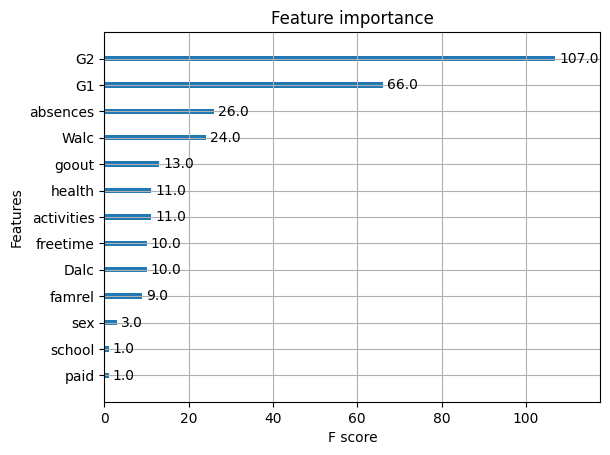

In [ ]:
from xgboost import plot_importance
plot_importance(xgb)

# 통계분석

데이터 분할 및 선형 회귀 적용

In [ ]:
import pandas as pd
